<a href="https://colab.research.google.com/github/jihankaruniaa/PCVK_Ganjil_2024/blob/main/Modul_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TUGAS PRAKTIKUM

#### 1. Gamma Correction
Pada percobaan ini, nilai Gamma akan diset dengan meminta masukan dari pengguna.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


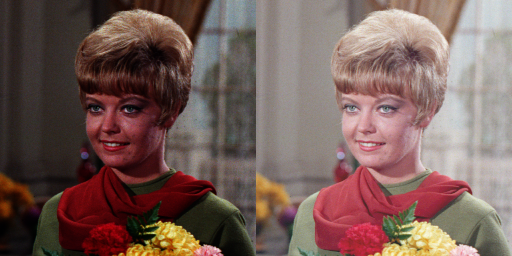

In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

def gamma_correction(image, gamma):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv.LUT(image, table)

print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/SEMESTER 5/PCVK/Image/female.tiff')
corrected_image = gamma_correction(original, gamma)

final_frame = cv.hconcat((original, corrected_image))
cv2_imshow(final_frame)

#### 2. Simulasi Image Depth
Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi citra, pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit). Pada pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga 255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0 (000 0000) hingga 127 (111 1111). Kemungkinan warna didapat dari pangkat 2 jumlah bit. Jika 7bit, maka jumlah warnanya adalah 27 = 128, dst.


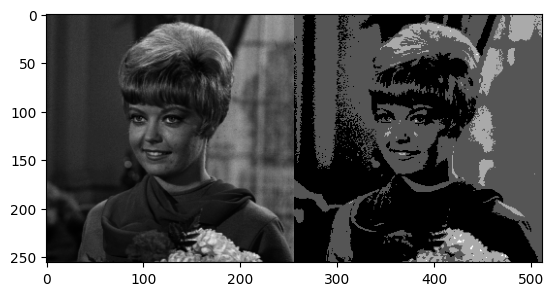

In [15]:
bit_depth=2
level = 255 / (pow(2,bit_depth)-1)
original = cv.imread('/content/drive/MyDrive/SEMESTER 5/PCVK/Image/female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    depth_image[y, x] = np.clip(round(original[y, x] / level) * level, 0, 255);

final_frame = cv.hconcat((original, depth_image))
plt.imshow(final_frame, cmap='gray')
plt.axis('on')
plt.show()

#### 3. Modul Average Denoising



Nilai PSNR dengan 5 citra : 27.538953 dB


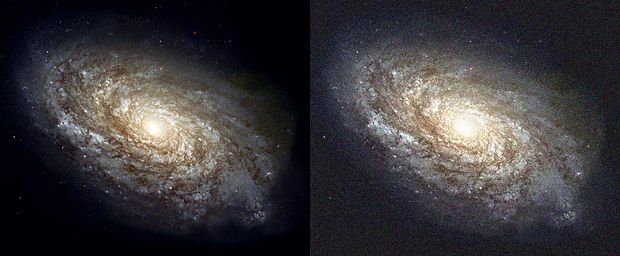



Nilai PSNR dengan 10 citra : 27.555095 dB


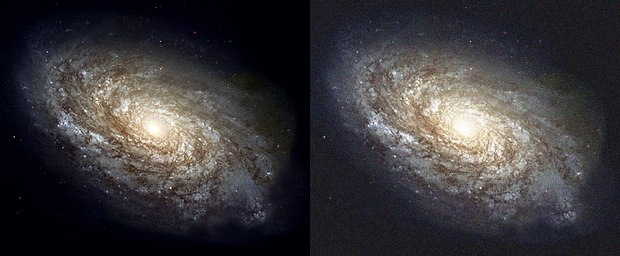



Nilai PSNR dengan 20 citra : 27.549070 dB


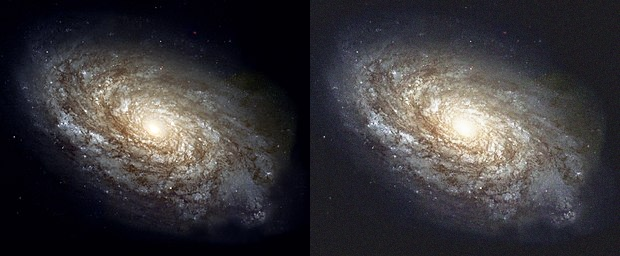



Nilai PSNR dengan 40 citra : 27.496443 dB


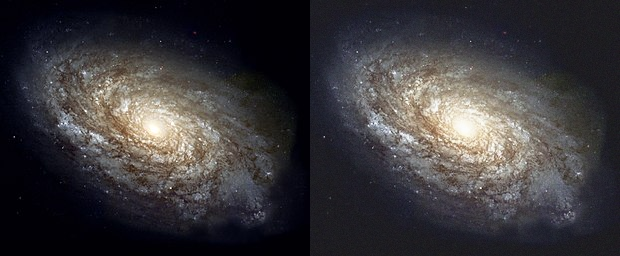



Nilai PSNR dengan 80 citra : 27.436421 dB


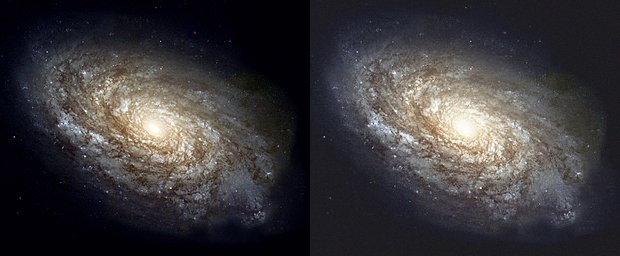



Nilai PSNR dengan 100 citra : 27.387879 dB


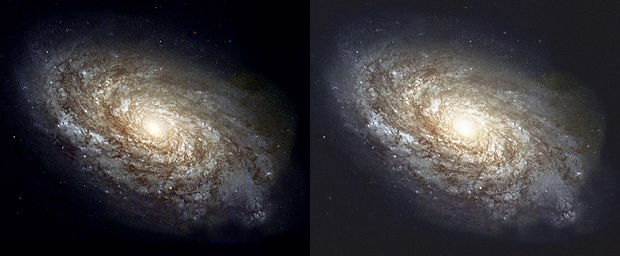

In [40]:
import glob
from math import log10, sqrt
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk menghitung PSNR antara dua gambar
def PSNR(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

original = cv.imread('/content/drive/MyDrive/SEMESTER 5/PCVK/Assets/galaxy.jpg')

cv_img = []
for img in glob.glob('/content/drive/MyDrive/SEMESTER 5/PCVK/Assets/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

# Jumlah gambar yang akan diuji
images = [5, 10, 20, 40, 80, 100]

for num_images in images:
    # Rata-rata gambar
    average_img = np.zeros(cv_img[0].shape, np.float32)

    for i in range(num_images):
        average_img += cv_img[i].astype(np.float32)

    denoised_img = average_img / num_images
    denoised_img = cv.convertScaleAbs(denoised_img)
    psnr_value = PSNR(original, denoised_img)

    print('\n')
    print(f'Nilai PSNR dengan {num_images} citra : {psnr_value:f} dB')

    galaxy_frame = cv.hconcat([original, denoised_img])
    cv2_imshow(galaxy_frame)

Dari hasil nilai PSNR, terlihat bahwa hasil menurun seiring bertambahnya jumlah gambar. Nilai PSNR lebih tinggi pada kelompok gambar yang lebih sedikit (5, 10, 20 gambar) dan mulai menurun signifikan pada kelompok dengan gambar yang lebih banyak (40, 80, 100 gambar). Ini menunjukkan bahwa seiring bertambahnya jumlah gambar, kualitas gambar mengalami penurunan, meskipun perubahan ini tidak terlalu drastis.

#### 4. Image Masking

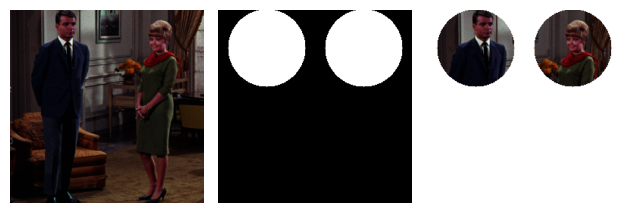

In [89]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('/content/drive/MyDrive/SEMESTER 5/PCVK/Assets/couple.tiff')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

mask = np.zeros(img.shape[:2], dtype=np.uint8)
cv.circle(mask, (img.shape[1]//4, img.shape[0]//5), min(img.shape[0]//5, img.shape[1]//5), 255, -1)
cv.circle(mask, (3*img.shape[1]//4, img.shape[0]//5), min(img.shape[0]//5, img.shape[1]//5), 255, -1)

final = np.where(mask[:, :, None] == 255, img, np.ones_like(img) * 255)

fig, axs = plt.subplots(1, 3)
axs[0].imshow(img)
axs[1].imshow(mask, cmap='gray')
axs[2].imshow(final)

for ax in axs.flat:
    ax.axis('off')

plt.tight_layout()
plt.show()

#### 5. Lakukan percobaan menggunakan operator lain

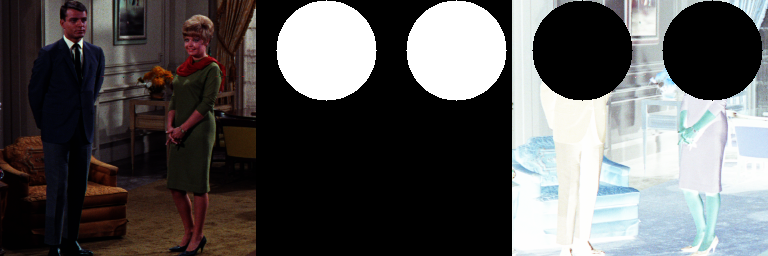

In [103]:
# NOT

img = cv.imread('/content/drive/MyDrive/SEMESTER 5/PCVK/Assets/couple.tiff')

# Menentukan pusat dan jari-jari lingkaran pertama
center1 = (70, 50)
radius1 = 50

# Menentukan pusat dan jari-jari lingkaran kedua
center2 = (200, 50)
radius2 = 50

mask = np.zeros(img.shape, dtype=np.uint8)
cv.circle(mask, center1, radius1, (255, 255, 255), thickness=-1)
cv.circle(mask, center2, radius2, (255, 255, 255), thickness=-1)

masked = ~img & ~mask

result = cv.hconcat((img, mask, masked))
cv2_imshow(result)

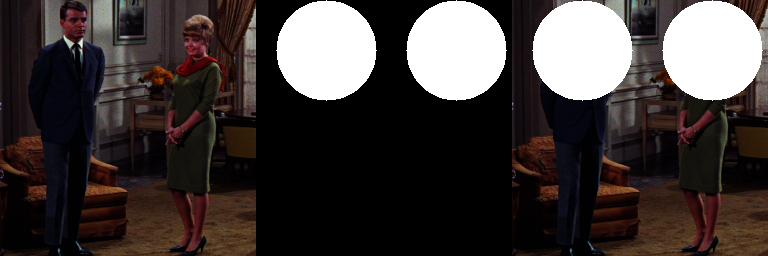

In [104]:
# OR

img = cv.imread('/content/drive/MyDrive/SEMESTER 5/PCVK/Assets/couple.tiff')

# Menentukan pusat dan jari-jari lingkaran pertama
center1 = (70, 50)
radius1 = 50

# Menentukan pusat dan jari-jari lingkaran kedua
center2 = (200, 50)
radius2 = 50

mask = np.zeros(img.shape, dtype=np.uint8)
cv.circle(mask, center1, radius1, (255, 255, 255), thickness=-1)
cv.circle(mask, center2, radius2, (255, 255, 255), thickness=-1)

masked = img | mask

result = cv.hconcat((img, mask, masked))
cv2_imshow(result)

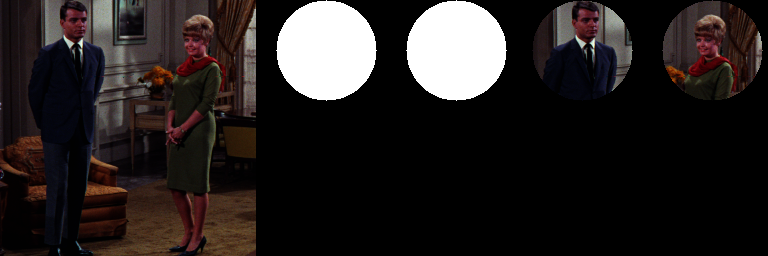

In [105]:
# AND

img = cv.imread('/content/drive/MyDrive/SEMESTER 5/PCVK/Assets/couple.tiff')

# Menentukan pusat dan jari-jari lingkaran pertama
center1 = (70, 50)
radius1 = 50

# Menentukan pusat dan jari-jari lingkaran kedua
center2 = (200, 50)
radius2 = 50

mask = np.zeros(img.shape, dtype=np.uint8)
cv.circle(mask, center1, radius1, (255, 255, 255), thickness=-1)
cv.circle(mask, center2, radius2, (255, 255, 255), thickness=-1)

masked = img & mask

result = cv.hconcat((img, mask, masked))
cv2_imshow(result)

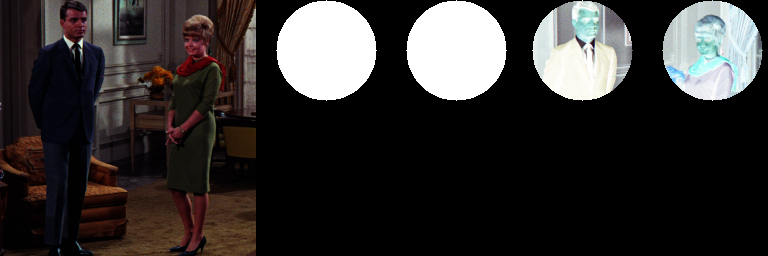

In [106]:
# NOT AND

img = cv.imread('/content/drive/MyDrive/SEMESTER 5/PCVK/Assets/couple.tiff')

# Menentukan pusat dan jari-jari lingkaran pertama
center1 = (70, 50)
radius1 = 50

# Menentukan pusat dan jari-jari lingkaran kedua
center2 = (200, 50)
radius2 = 50

mask = np.zeros(img.shape, dtype=np.uint8)

cv.circle(mask, center1, radius1, (255, 255, 255), thickness=-1)
cv.circle(mask, center2, radius2, (255, 255, 255), thickness=-1)

masked = ~img & mask

result = cv.hconcat((img, mask, masked))
cv2_imshow(result)

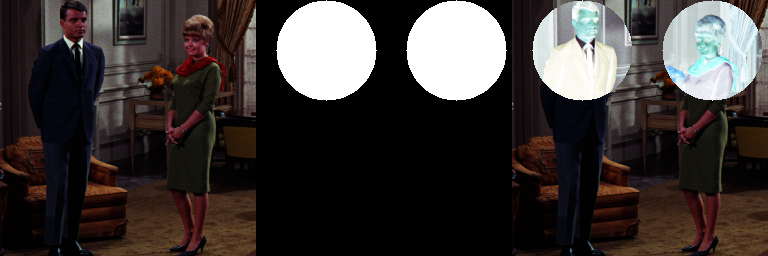

In [107]:
# XOR

img = cv.imread('/content/drive/MyDrive/SEMESTER 5/PCVK/Assets/couple.tiff')

# Menentukan pusat dan jari-jari lingkaran pertama
center1 = (70, 50)
radius1 = 50

# Menentukan pusat dan jari-jari lingkaran kedua
center2 = (200, 50)
radius2 = 50

mask = np.zeros(img.shape, dtype=np.uint8)
cv.circle(mask, center1, radius1, (255, 255, 255), thickness=-1)
cv.circle(mask, center2, radius2, (255, 255, 255), thickness=-1)

masked = img ^ mask

result = cv.hconcat((img, mask, masked))
cv2_imshow(result)

1. Operator NOT menampilkan piksel di luar area yang dibuat serta mengubah citra menjadi negatif (inverse).

2. Operator AND menampilkan piksel di area yang dibuat.

3. Operator OR menampilkan piksel di luar area yang dibuat.

4. Operator NAND menampilkan piksel di area yang dibua serta mengubah citra menjadi negatif (inverse).

5. Operator XOR menampilkan seluruh piksel namun piksel di luar area yang tetap normal (original) serta piksel di luar area menjadi negatif (inverse).